In [68]:
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models, layers, optimizers, losses
from keras.datasets import reuters
import matplotlib.pyplot as plt

In [53]:
(trainx, trainy), (testx, testy) = reuters.load_data(num_words=10000)

In [25]:
word_dict = reuters.get_word_index()
reverse_words = dict([(value, key) for (key, value) in word_dict.items()])

review = ' '.join([reverse_words.get(i-3, '?') for i in trainx[1000]])

In [54]:
def vectorize_sequence(sequence, dimension=10000):
  result = np.zeros((len(sequence), dimension))

  for i, j in enumerate(sequence):
    result[i, j] = 1
  
  return result

In [55]:
trainx = vectorize_sequence(trainx)
testx = vectorize_sequence(testx)

In [56]:
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [59]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu',))
model.add(layers.Dense(46, activation='softmax'))

In [67]:
model.compile(optimizer = optimizers.RMSprop(),
              loss = losses.categorical_crossentropy,
              metrics = ['accuracy'])

In [69]:
valx = trainx[-1000:]
valy = trainy[-1000:]

trainx = trainx[:-1000]
trainy = trainy[:-1000]

In [ ]:
history = model.fit(trainx, trainy, batch_size = 512, epochs = 20, validation_data = (valx, valy))

In [75]:
history_dict = history.history

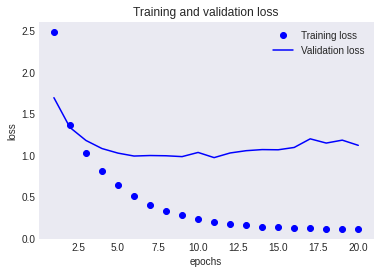

In [79]:
plt.style.use('seaborn-dark')

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,21)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training and validation loss')

plt.show()

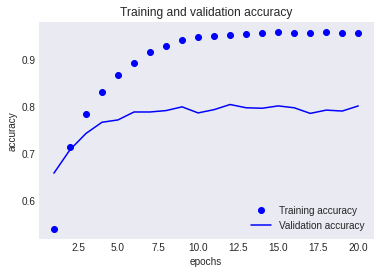

In [80]:
plt.style.use('seaborn-dark')

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1,21)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and validation accuracy')

plt.show()

In [83]:
result = model.evaluate(testx, testy)
print(result)

2246/2246 [==============================] - 0s 100us/step
[1.1830768536374916, 0.7889581322669983]


In [85]:
prediction = model.predict(testx)

print(prediction[0].shape)
print(np.argmax(prediction[0]))

(46,)
3
